# Optimize the set of samples for limited learning

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
class Const:
    """All constants collected together."""
    img_size = 28
    nclasses = 10
    
C = Const()

In [3]:
(xtrain,ytrain), (xtest,ytest) = tf.keras.datasets.mnist.load_data()

def scale_mnist(x):
    x  = x.astype('float32')/255
    x = np.expand_dims(x,3) # Weird extra axis for channels, to make keras work
    return x
    
xtrain = scale_mnist(xtrain)
xtest  = scale_mnist(xtest)

ytrain = tf.keras.utils.to_categorical(ytrain, C.nclasses)
ytest  = tf.keras.utils.to_categorical(ytest, C.nclasses)

In [4]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(C.img_size, C.img_size, 1)), # Universal input layer
        tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(C.nclasses, activation='softmax')
    ])
    
    optimizer = tf.keras.optimizers.Adam()

    model.compile(loss='categorical_crossentropy',
                 optimizer=optimizer,
                 metrics=['accuracy'])
    
    return model

model = build_model()
#model.summary()

[[ 1  3  5  7  2  0 13 15 17  4]
 [21  6 16 10  9 11 18 29 31 19]
 [34  8 25 12 20 35 32 38 41 22]
 [37 14 28 27 26 47 36 42 46 33]
 [51 23 76 30 53 65 39 52 55 43]]


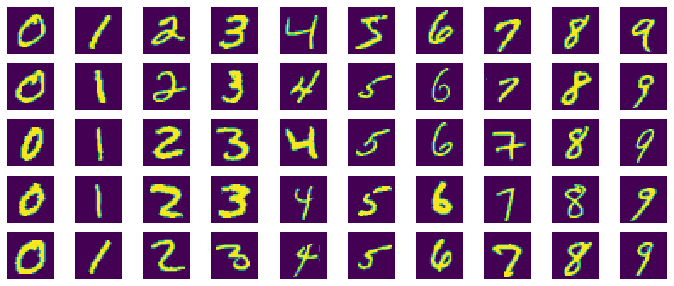

In [5]:
# Pick a few complete sets of digits

nrows = 5
hist = [0]*10
indices = np.zeros((nrows, 10), dtype=int)
plt.figure(figsize=(12,5))
i = 0
while min(hist) < nrows:
    label = np.argmax(ytrain[i])
    if hist[label]<nrows:
        plt.subplot(nrows, 10, 1+label+hist[label]*10)
        plt.imshow(xtrain[i,:,:,0]);
        #plt.title(label)
        plt.axis('off')
        indices[hist[label], label] = i
        hist[label] += 1
    i += 1
    
print(indices)

In [6]:
class PrintDot(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 10 == 0: print('')
        print(f" {logs['loss']:.3f}".replace('0.','.'), end='')

In [7]:
# Create a new model, and train it on 10 samples only 
def test_subset(indices):
    model2 = build_model()

    hist = model2.fit(xtrain[indices], ytrain[indices],
                      batch_size=1024,
                      epochs=40,
                      verbose=0,
                      validation_data=(xtest, ytest))

    score = model2.evaluate(xtest, ytest, verbose=0)
    return score[1] # Accuracy
    
best_val = test_subset(indices[0,:])
print(best_val)

0.5743


New best  : 0.5092999935150146, with indices [ 1  3  5  7  2  0 13 15 17  4]
New best  : 0.526199996471405, with indices [ 1  3  5  7  2  0 18 15 17  4]
Bad result: 0.5058000087738037, with index 19 (label 9)
New best  : 0.531499981880188, with indices [ 1  3  5  7 20  0 18 15 17  4]
New best  : 0.5393000245094299, with indices [21  3  5  7 20  0 18 15 17  4]
Bad result: 0.49230000376701355, with index 22 (label 9)
Bad result: 0.5080000162124634, with index 23 (label 1)
Bad result: 0.5340999960899353, with index 24 (label 1)
Bad result: 0.527899980545044, with index 25 (label 2)
Bad result: 0.46369999647140503, with index 26 (label 4)
New best  : 0.5408999919891357, with indices [21  3  5 27 20  0 18 15 17  4]
Bad result: 0.5264999866485596, with index 28 (label 2)
Bad result: 0.48190000653266907, with index 29 (label 7)
Bad result: 0.5167999863624573, with index 30 (label 3)
Bad result: 0.48739999532699585, with index 31 (label 8)
Bad result: 0.5209000110626221, with index 32 (label 6

Bad result: 0.6036999821662903, with index 159 (label 2)
Bad result: 0.5715000033378601, with index 160 (label 8)
Bad result: 0.5472000241279602, with index 161 (label 2)
Bad result: 0.6010000109672546, with index 162 (label 9)
Bad result: 0.616100013256073, with index 163 (label 4)
Bad result: 0.6018000245094299, with index 164 (label 4)
Bad result: 0.6280999779701233, with index 165 (label 6)
Bad result: 0.6129000186920166, with index 166 (label 4)
Bad result: 0.586899995803833, with index 167 (label 9)
Bad result: 0.5931000113487244, with index 168 (label 7)
Bad result: 0.5809999704360962, with index 169 (label 0)
Bad result: 0.6031000018119812, with index 170 (label 9)
Bad result: 0.6539000272750854, with index 171 (label 2)
Bad result: 0.6021000146865845, with index 172 (label 9)
Bad result: 0.6068999767303467, with index 173 (label 5)
Bad result: 0.6273000240325928, with index 174 (label 1)
Bad result: 0.616599977016449, with index 175 (label 5)
Bad result: 0.5978999733924866, wi

Bad result: 0.6560999751091003, with index 301 (label 7)
Bad result: 0.6538000106811523, with index 302 (label 6)
Bad result: 0.6729000210762024, with index 303 (label 0)
Bad result: 0.6208000183105469, with index 304 (label 9)
Bad result: 0.5875999927520752, with index 305 (label 7)
Bad result: 0.5582000017166138, with index 306 (label 5)
Bad result: 0.6615999937057495, with index 307 (label 7)
Bad result: 0.6693000197410583, with index 308 (label 2)
Bad result: 0.5806999802589417, with index 309 (label 1)
Bad result: 0.652400016784668, with index 310 (label 1)
Bad result: 0.6660000085830688, with index 311 (label 6)
Bad result: 0.5929999947547913, with index 312 (label 8)
Bad result: 0.6323999762535095, with index 313 (label 9)
Bad result: 0.60589998960495, with index 314 (label 4)
Bad result: 0.6428999900817871, with index 315 (label 1)
Bad result: 0.5945000052452087, with index 316 (label 5)
Bad result: 0.6829000115394592, with index 317 (label 2)
Bad result: 0.6678000092506409, wi

Bad result: 0.6626999974250793, with index 445 (label 8)
Bad result: 0.5411999821662903, with index 446 (label 7)
Bad result: 0.6161999702453613, with index 447 (label 1)
Bad result: 0.6359000205993652, with index 448 (label 2)
Bad result: 0.6328999996185303, with index 449 (label 6)
Bad result: 0.6549000144004822, with index 450 (label 1)
Bad result: 0.6718999743461609, with index 451 (label 0)
Bad result: 0.6150000095367432, with index 452 (label 3)
Bad result: 0.642300009727478, with index 453 (label 0)
Bad result: 0.6013000011444092, with index 454 (label 1)
Bad result: 0.6200000047683716, with index 455 (label 1)
Bad result: 0.6565999984741211, with index 456 (label 8)
Bad result: 0.6376000046730042, with index 457 (label 2)
Bad result: 0.628000020980835, with index 458 (label 0)
Bad result: 0.605400025844574, with index 459 (label 3)
Bad result: 0.6782000064849854, with index 460 (label 9)
Bad result: 0.6381000280380249, with index 461 (label 4)
Bad result: 0.6963000297546387, wi

Bad result: 0.6110000014305115, with index 589 (label 9)
Bad result: 0.631600022315979, with index 590 (label 4)
Bad result: 0.6251000165939331, with index 591 (label 2)
Bad result: 0.6291000247001648, with index 592 (label 6)
Bad result: 0.614300012588501, with index 593 (label 1)
Bad result: 0.527400016784668, with index 594 (label 8)
Bad result: 0.619700014591217, with index 595 (label 9)
Bad result: 0.683899998664856, with index 596 (label 0)
Bad result: 0.633400022983551, with index 597 (label 6)
Bad result: 0.6424999833106995, with index 598 (label 6)
Bad result: 0.6513000130653381, with index 599 (label 7)
Bad result: 0.5738999843597412, with index 600 (label 9)
Bad result: 0.6218000054359436, with index 601 (label 9)
Bad result: 0.6304000020027161, with index 602 (label 8)
Bad result: 0.6499000191688538, with index 603 (label 0)
Bad result: 0.6815000176429749, with index 604 (label 1)
Bad result: 0.6419000029563904, with index 605 (label 4)
Bad result: 0.6392999887466431, with 

Bad result: 0.6682000160217285, with index 734 (label 8)
Bad result: 0.694599986076355, with index 735 (label 6)
Bad result: 0.5741999745368958, with index 736 (label 8)
Bad result: 0.5550000071525574, with index 737 (label 6)
Bad result: 0.603600025177002, with index 738 (label 1)
Bad result: 0.644599974155426, with index 739 (label 6)
Bad result: 0.5852000117301941, with index 740 (label 8)
Bad result: 0.6341999769210815, with index 741 (label 9)
Bad result: 0.640999972820282, with index 742 (label 4)
Bad result: 0.6348999738693237, with index 743 (label 0)
Bad result: 0.6610000133514404, with index 744 (label 9)
Bad result: 0.5960999727249146, with index 745 (label 0)
Bad result: 0.6450999975204468, with index 746 (label 4)
Bad result: 0.5945000052452087, with index 747 (label 1)
Bad result: 0.6180999875068665, with index 748 (label 5)
Bad result: 0.5852000117301941, with index 749 (label 4)
Bad result: 0.5956000089645386, with index 750 (label 7)
Bad result: 0.6692000031471252, wit

Bad result: 0.6851999759674072, with index 878 (label 3)
Bad result: 0.6219000220298767, with index 879 (label 5)
Bad result: 0.6442000269889832, with index 880 (label 7)
Bad result: 0.6168000102043152, with index 881 (label 6)
Bad result: 0.652400016784668, with index 882 (label 4)
Bad result: 0.649399995803833, with index 883 (label 7)
Bad result: 0.5336999893188477, with index 884 (label 7)
Bad result: 0.5570999979972839, with index 885 (label 8)
Bad result: 0.6687999963760376, with index 886 (label 5)
Bad result: 0.6460999846458435, with index 887 (label 9)
Bad result: 0.6420999765396118, with index 888 (label 7)
Bad result: 0.6276000142097473, with index 889 (label 0)
Bad result: 0.6272000074386597, with index 890 (label 3)
Bad result: 0.5953999757766724, with index 891 (label 1)
Bad result: 0.5976999998092651, with index 892 (label 6)
Bad result: 0.6438000202178955, with index 893 (label 2)
Bad result: 0.5895000100135803, with index 894 (label 4)
Bad result: 0.6340000033378601, w

Bad result: 0.6754000186920166, with index 1022 (label 7)
Bad result: 0.6208999752998352, with index 1023 (label 7)
Bad result: 0.5665000081062317, with index 1024 (label 5)
Bad result: 0.6428999900817871, with index 1025 (label 8)
Bad result: 0.6420999765396118, with index 1026 (label 8)
Bad result: 0.6491000056266785, with index 1027 (label 9)
Bad result: 0.650600016117096, with index 1028 (label 0)
Bad result: 0.6355000138282776, with index 1029 (label 0)
Bad result: 0.6129999756813049, with index 1030 (label 4)
Bad result: 0.640999972820282, with index 1031 (label 1)
Bad result: 0.5903000235557556, with index 1032 (label 5)
Bad result: 0.6599000096321106, with index 1033 (label 2)
Bad result: 0.6741999983787537, with index 1034 (label 2)
Bad result: 0.6431000232696533, with index 1035 (label 3)
Bad result: 0.5594000220298767, with index 1036 (label 9)
Bad result: 0.6128000020980835, with index 1037 (label 4)
Bad result: 0.6700999736785889, with index 1038 (label 9)
Bad result: 0.63

Bad result: 0.6556000113487244, with index 1164 (label 4)
Bad result: 0.6373999714851379, with index 1165 (label 2)
Bad result: 0.6510999798774719, with index 1166 (label 7)
Bad result: 0.6769000291824341, with index 1167 (label 9)
Bad result: 0.597599983215332, with index 1168 (label 0)
Bad result: 0.656000018119812, with index 1169 (label 9)
Bad result: 0.6205000281333923, with index 1170 (label 8)
Bad result: 0.6075999736785889, with index 1171 (label 4)
Bad result: 0.6316999793052673, with index 1172 (label 4)
Bad result: 0.6622999906539917, with index 1173 (label 9)
Bad result: 0.6320000290870667, with index 1174 (label 1)
Bad result: 0.661300003528595, with index 1175 (label 2)
Bad result: 0.6087999939918518, with index 1176 (label 4)
Bad result: 0.644599974155426, with index 1177 (label 9)
Bad result: 0.6435999870300293, with index 1178 (label 3)
Bad result: 0.6676999926567078, with index 1179 (label 0)
Bad result: 0.6672000288963318, with index 1180 (label 4)
Bad result: 0.6448

Bad result: 0.6026999950408936, with index 1306 (label 7)
Bad result: 0.660099983215332, with index 1307 (label 9)
Bad result: 0.6674000024795532, with index 1308 (label 4)
Bad result: 0.6183000206947327, with index 1309 (label 6)
Bad result: 0.6050999760627747, with index 1310 (label 0)
Bad result: 0.6776000261306763, with index 1311 (label 5)
Bad result: 0.6782000064849854, with index 1312 (label 3)
Bad result: 0.6660000085830688, with index 1313 (label 5)
Bad result: 0.6159999966621399, with index 1314 (label 7)
Bad result: 0.6621000170707703, with index 1315 (label 3)
Bad result: 0.6553000211715698, with index 1316 (label 9)
Bad result: 0.5932000279426575, with index 1317 (label 3)
Bad result: 0.6431000232696533, with index 1318 (label 6)
Bad result: 0.6137999892234802, with index 1319 (label 8)
Bad result: 0.6147000193595886, with index 1320 (label 3)
Bad result: 0.6585999727249146, with index 1321 (label 1)
Bad result: 0.5659000277519226, with index 1322 (label 7)
Bad result: 0.6

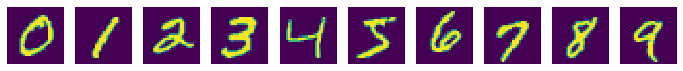

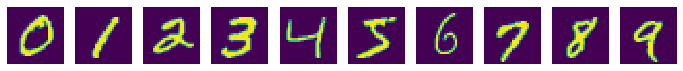

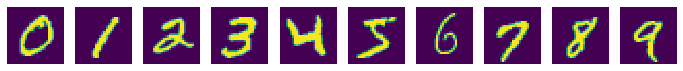

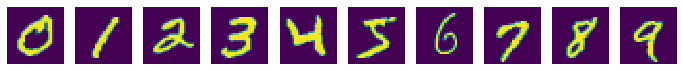

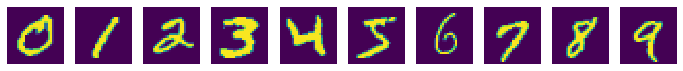

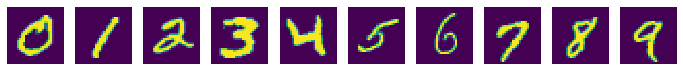

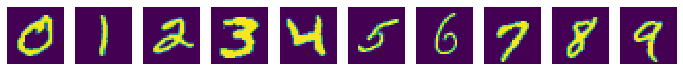

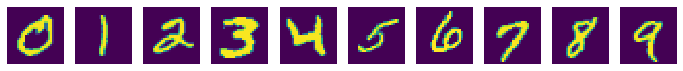

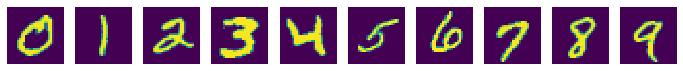

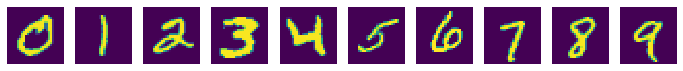

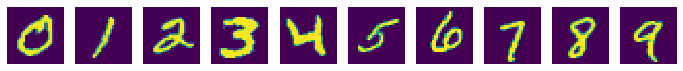

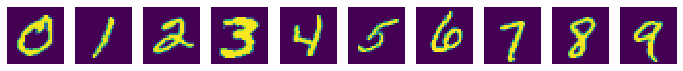

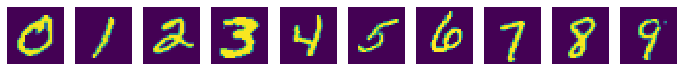

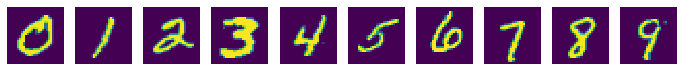

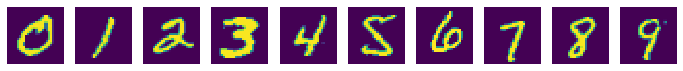

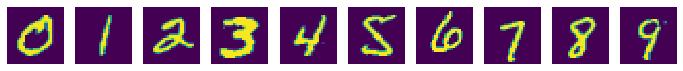

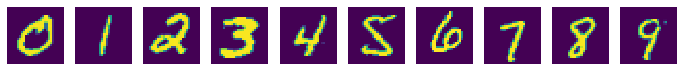

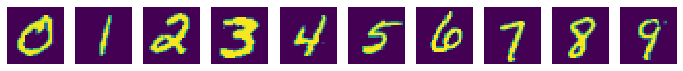

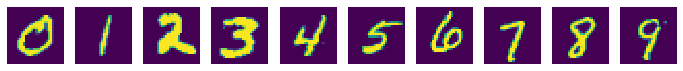

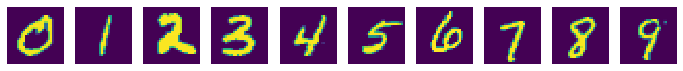

In [8]:
# Find most representative data

n_improvements = 20
ind = indices[0,:] # Starting value
i = max(ind)
count = 0
ind_best = []
best_val = 0
while count < n_improvements:
    label = np.argmax(ytrain[i])
    ind[label] = i
    new_val = test_subset(ind)
    if new_val > best_val:
        count += 1
        best_val = new_val
        ind_best = ind.copy()
        print(f"New best  : {best_val}, with indices {ind}")
        plt.figure(figsize=(12,2))
        for k in range(10):
            plt.subplot(1, 10, k+1)
            plt.imshow(xtrain[ind[k],:,:,0]);
            plt.axis('off')
    else:
        print(f"Bad result: {new_val}, with index {i} (label {label})")
        ind = ind_best.copy() # Reset to previous best
    i += 1

    New best  : 0.6366999745368958, with indices [ 1 77  5 50 20  0 13 15 41  4]

    New best  : 0.5092999935150146, with indices [ 1  3  5  7  2  0 13 15 17  4]
    New best  : 0.526199996471405, with indices [ 1  3  5  7  2  0 18 15 17  4]
    New best  : 0.531499981880188, with indices [ 1  3  5  7 20  0 18 15 17  4]
    New best  : 0.5393000245094299, with indices [21  3  5  7 20  0 18 15 17  4]
    New best  : 0.5408999919891357, with indices [21  3  5 27 20  0 18 15 17  4]
    New best  : 0.5807999968528748, with indices [21  3  5 27 20 35 18 15 17  4]
    New best  : 0.5921000242233276, with indices [21 72  5 27 20 35 18 15 17  4]
    New best  : 0.5985999703407288, with indices [21 72  5 27 20 35 83 15 17  4]
    New best  : 0.6033999919891357, with indices [21 72  5 27 20 35 83 15 94  4]
    New best  : 0.6406000256538391, with indices [21 72  5 27 20 35 83 96 94  4]
    New best  : 0.6543999910354614, with indices [21 99  5 27 20 35 83 96 94  4]
    New best  : 0.6553000211715698, with indices [ 21  99   5  27 237  35  83  96  94   4]
    New best  : 0.6564000248908997, with indices [ 21  99   5  27 237  35  83  96  94 247]
    New best  : 0.6571000218391418, with indices [ 21  99   5  27 257  35  83  96  94 247]
    New best  : 0.6761000156402588, with indices [ 21  99   5  27 257 266  83  96  94 247]
    New best  : 0.691100001335144, with indices [ 21 276   5  27 257 266  83  96  94 247]
    New best  : 0.7060999870300293, with indices [ 21 276 375  27 257 266  83  96  94 247]
    New best  : 0.7085999846458435, with indices [ 21 276 375  27 257 537  83  96  94 247]
    New best  : 0.7123000025749207, with indices [  21  276 1397   27  257  537   83   96   94  247]
    New best  : 0.7156999707221985, with indices [  21  276 1397 1409  257  537   83   96   94  247]